In [1]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 37s 0us/step


In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/home/geist/Desktop/projects/kaggle/cats_dogs/elephant.jpeg'

img = image.load_img(img_path, target_size=(224,224))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x= preprocess_input(x)

In [3]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 3us/step
('predicted:', [(u'n02504458', u'African_elephant', 0.9101744), (u'n01871265', u'tusker', 0.08544522), (u'n02504013', u'Indian_elephant', 0.0043368954)])


In [4]:
np.argmax(preds[0])

386

In [5]:
from keras import backend as K

african_elephant_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0,1,2))

iterate = K.function([model.input],
                    [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i]*= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)

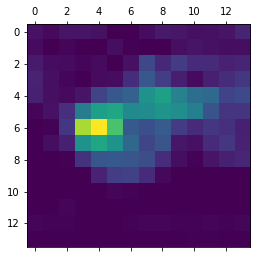

In [8]:
import matplotlib.pyplot as plt
heatmap = np.maximum(heatmap, 0)
heatmap/= np.max(heatmap)
plt.matshow(heatmap)

In [9]:
import cv2

In [10]:
img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255*heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('/home/geist/Desktop/projects/kaggle/cats_dogs/elephant_cam.jpg', superimposed_img)

True